In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load Dataset

In [2]:
df= pd.read_csv('loan_data_2007_2014.csv', index_col=0)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1= pd.read_excel('/content/drive/MyDrive/IDX FINAL TASK/LCDataDictionary.xlsx')

In [ ]:
df1

,Unnamed: 0,Description,Unnamed: 2
0,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
1,annual_inc,The self-reported annual income provided by th...,Penghasilan tahunan yang dilaporkan sendiri ya...
2,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...
3,application_type,Indicates whether the loan is an individual ap...,Menunjukkan apakah pinjaman adalah aplikasi in...
4,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya penagihan
...,...,...,...
75,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
76,tot_coll_amt,Total collection amounts ever owed,Total jumlah pengumpulan yang pernah ada
77,tot_cur_bal,Total current balance of all accounts,Total Saldo Saat Ini dari Semua Akun
78,NaN,NaN,NaN


## 1. Exploration Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [ ]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


Pick and Separate Columns

In [ ]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [24]:
cats = ['term', 'grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d','loan_status',
        'pymnt_plan','url','desc','purpose','title','zip_code','addr_state','earliest_cr_line','initial_list_status',
        'last_pymnt_d','next_pymnt_d','last_credit_pull','application_type']
nums =['member_id','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs',
       'inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util',
       'total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
       'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med',
       'mths_since_last_major_derog','policy_code','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl',
       'inq_last_12m']

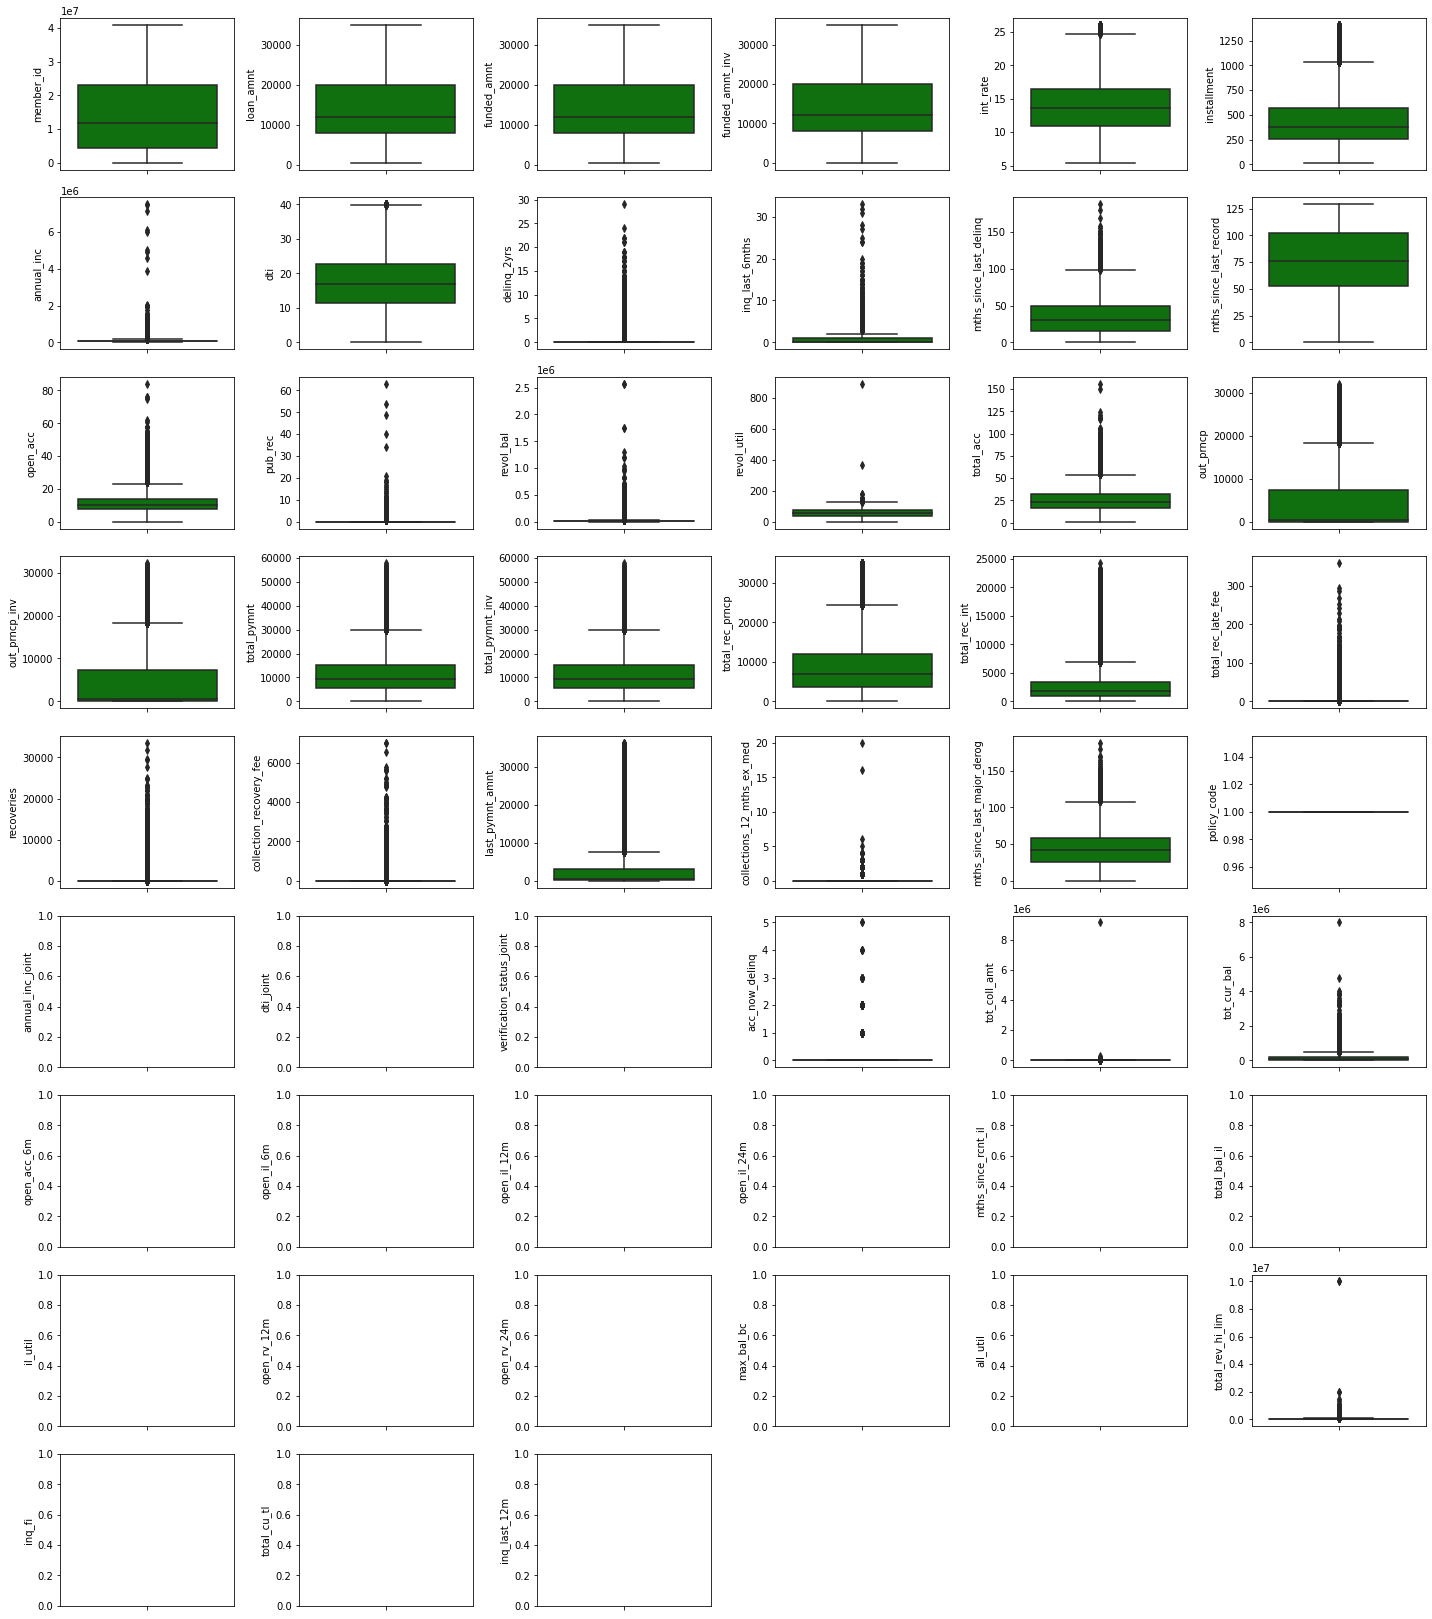

In [ ]:
features = nums
plt.figure(figsize=(20, 25))
for i in range(0, len(features)):
    plt.subplot(10, 6, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

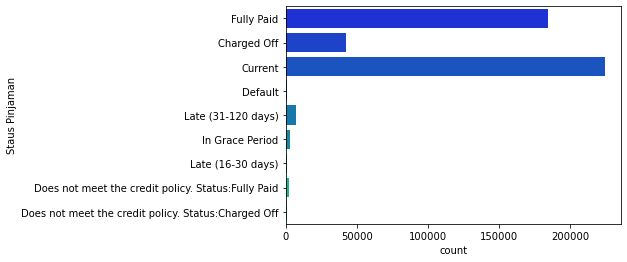

In [3]:
sns.countplot(data=df, y='loan_status', palette='winter')
plt.ylabel("Staus Pinjaman")
plt.show()

Menentukan status pinjaman

membuat dua kategori status pinjaman dari beberapa status pinjangan


Approved : Fully Paid

Reject : Charged off, Default, Does not meet the credit policy. Status:Fully Paid, Does not meet the credit policy. Status:Charged Off


sedangkan untuk Late(31-120 days), Late(16-30 days), In Grace Period, dan Current merupakan status pinjaman yang sedang berlangsung.

In [4]:
Good=['Fully Paid']
Bad =['Charged Off','Default','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off']

In [5]:
def loan (status):
    if status in Bad:
        return 0
    return 1

In [6]:
df = df[df["loan_status"].isin(Good+ Bad)].copy()
df["loan_status"] = df["loan_status"].apply(loan)

In [7]:
#df.to_csv("data_awal.csv", sep=',', encoding='UTF-8')

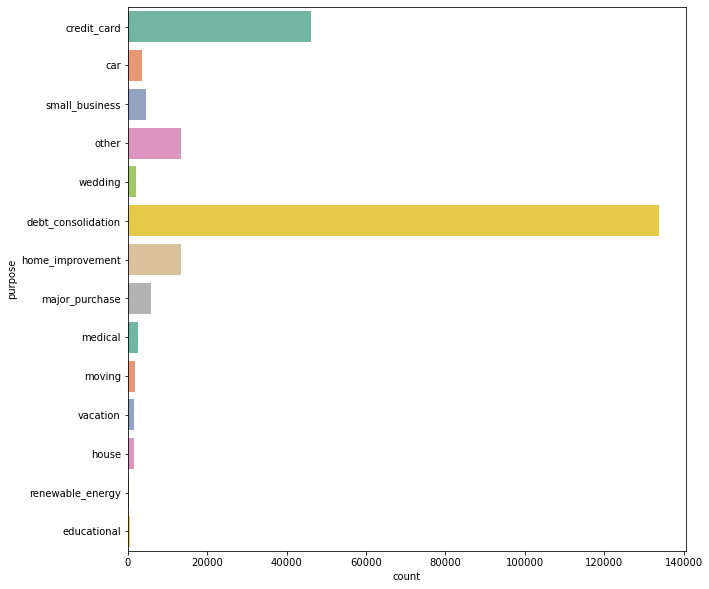

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(y= "purpose", data = df, palette = "Set2")
plt.show()


In [23]:

two = ['#104E8B', '#00BFFF']


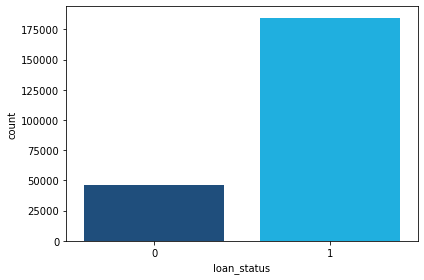

In [10]:
sns.countplot(x=df['loan_status'], palette=two)
plt.tight_layout()

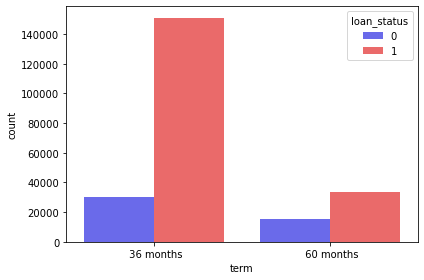

In [11]:
sns.countplot(x=df['term'], data=df,  palette="seismic", hue="loan_status")
plt.tight_layout()

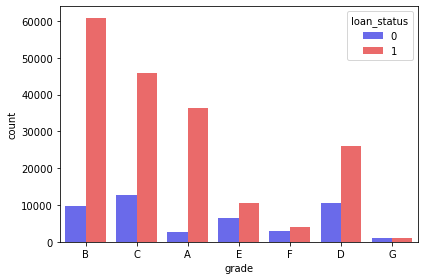

In [12]:
sns.countplot(x=df['grade'], data=df,  palette="seismic", hue="loan_status")
plt.tight_layout()

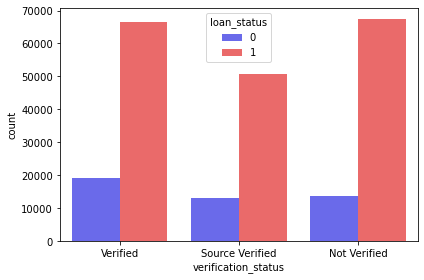

In [13]:
sns.countplot(x=df['verification_status'], data=df,  palette="seismic", hue="loan_status")
plt.tight_layout()

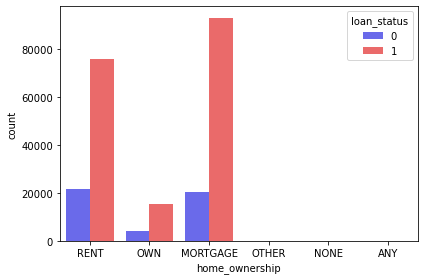

In [14]:
sns.countplot(x=df['home_ownership'], data=df,  palette="seismic", hue="loan_status")
plt.tight_layout()

In [32]:
nums_vis=['funded_amnt','funded_amnt_inv','int_rate','installment','open_acc']

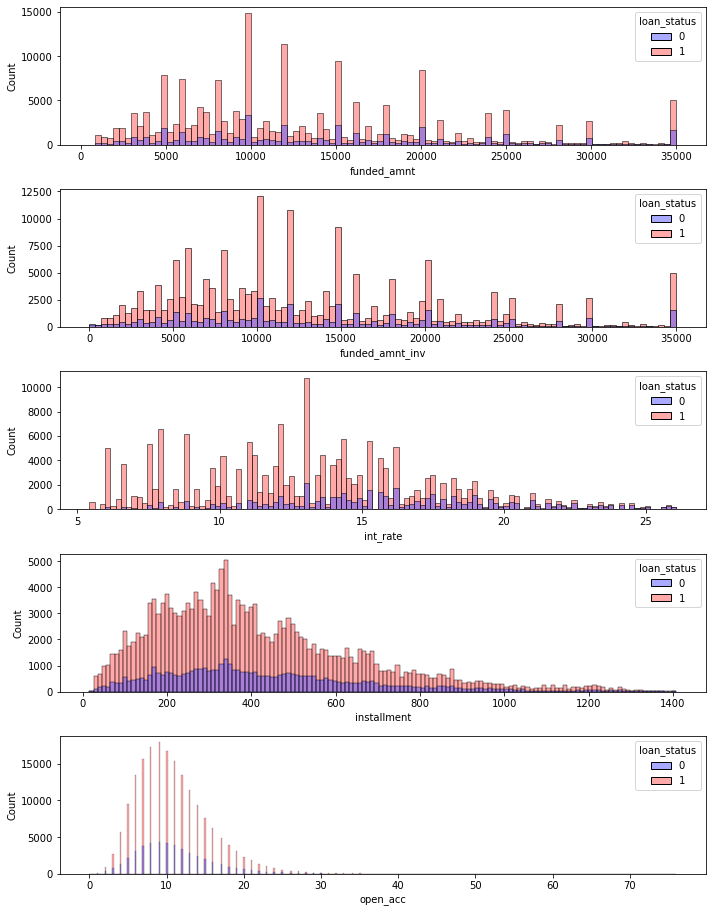

In [33]:
features = nums_vis
plt.figure(figsize=(10, 25))
for i in range(0, len(features)):
    plt.subplot(10, 1, i+1) 
    sns.histplot(x=features[i], data=df,  palette="seismic", hue="loan_status")
    #plt.xlabel(features[i])
    plt.tight_layout()

## 2. Data Preprocessing

In [34]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [35]:
df['emp_length'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')

In [36]:
df['emp_length'] = df['emp_length'].astype(float)

In [37]:
df['emp_length'].unique()

array([10.,  0.,  3.,  9.,  4.,  5.,  1.,  6.,  2.,  7.,  8., nan])

In [38]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [39]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(float)

In [40]:
df.drop('term', axis=1, inplace=True)

earliest_cr_line

In [41]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [42]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
5   2004-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [43]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
5    157.0
Name: mths_since_earliest_cr_line, dtype: float64

In [44]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))


In [45]:
df['mths_since_earliest_cr_line'].describe()

count    230766.000000
mean        236.890582
std          89.732723
min        -612.000000
25%         183.000000
50%         223.000000
75%         279.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [46]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
3413,Jun-67,2067-06-01,-594.0


In [47]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [48]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

issue_d

In [49]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [50]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

last_pymnt_d

In [51]:
df['last_payment_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['months_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_payment_d_date']) / np.timedelta64(1, 'M')))

In [52]:
df.drop(['last_pymnt_d', 'last_payment_d_date'], axis=1, inplace=True)

next_payment_d

In [53]:
df['next_payment_d_date']=pd.to_datetime(df['next_pymnt_d'], format='%b-%y')

In [54]:
df['months_since_next_payment_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_payment_d_date']) / np.timedelta64(1, 'M')))

In [55]:
df.drop(['next_pymnt_d','next_payment_d_date'], axis=1, inplace=True)

last_credit_pull_d

In [56]:
df['last_credit_pull_d_date']=pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [57]:
df['months_since_last_pull_d_date']=round(pd.to_numeric((pd.to_datetime('2017-12-01')-df['last_credit_pull_d_date'])/np.timedelta64(1,'M')))

In [58]:
df.drop(['last_credit_pull_d','last_credit_pull_d_date'], axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 74 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             230795 non-null  int64  
 1   member_id                      230795 non-null  int64  
 2   loan_amnt                      230795 non-null  int64  
 3   funded_amnt                    230795 non-null  int64  
 4   funded_amnt_inv                230795 non-null  float64
 5   int_rate                       230795 non-null  float64
 6   installment                    230795 non-null  float64
 7   grade                          230795 non-null  object 
 8   sub_grade                      230795 non-null  object 
 9   emp_title                      217878 non-null  object 
 10  emp_length                     222040 non-null  float64
 11  home_ownership                 230795 non-null  object 
 12  annual_inc                    

In [60]:
columns_to_remove =[
    'id', 'member_id',# unique id
    'url', 'desc',# free text
    'zip_code', 'annual_inc_joint','dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 
    'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
    'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', # all null / constant / others 
    'sub_grade',
    'policy_code' #One Unique
]

In [61]:
df=df.drop(columns_to_remove, axis=1)

<AxesSubplot:>

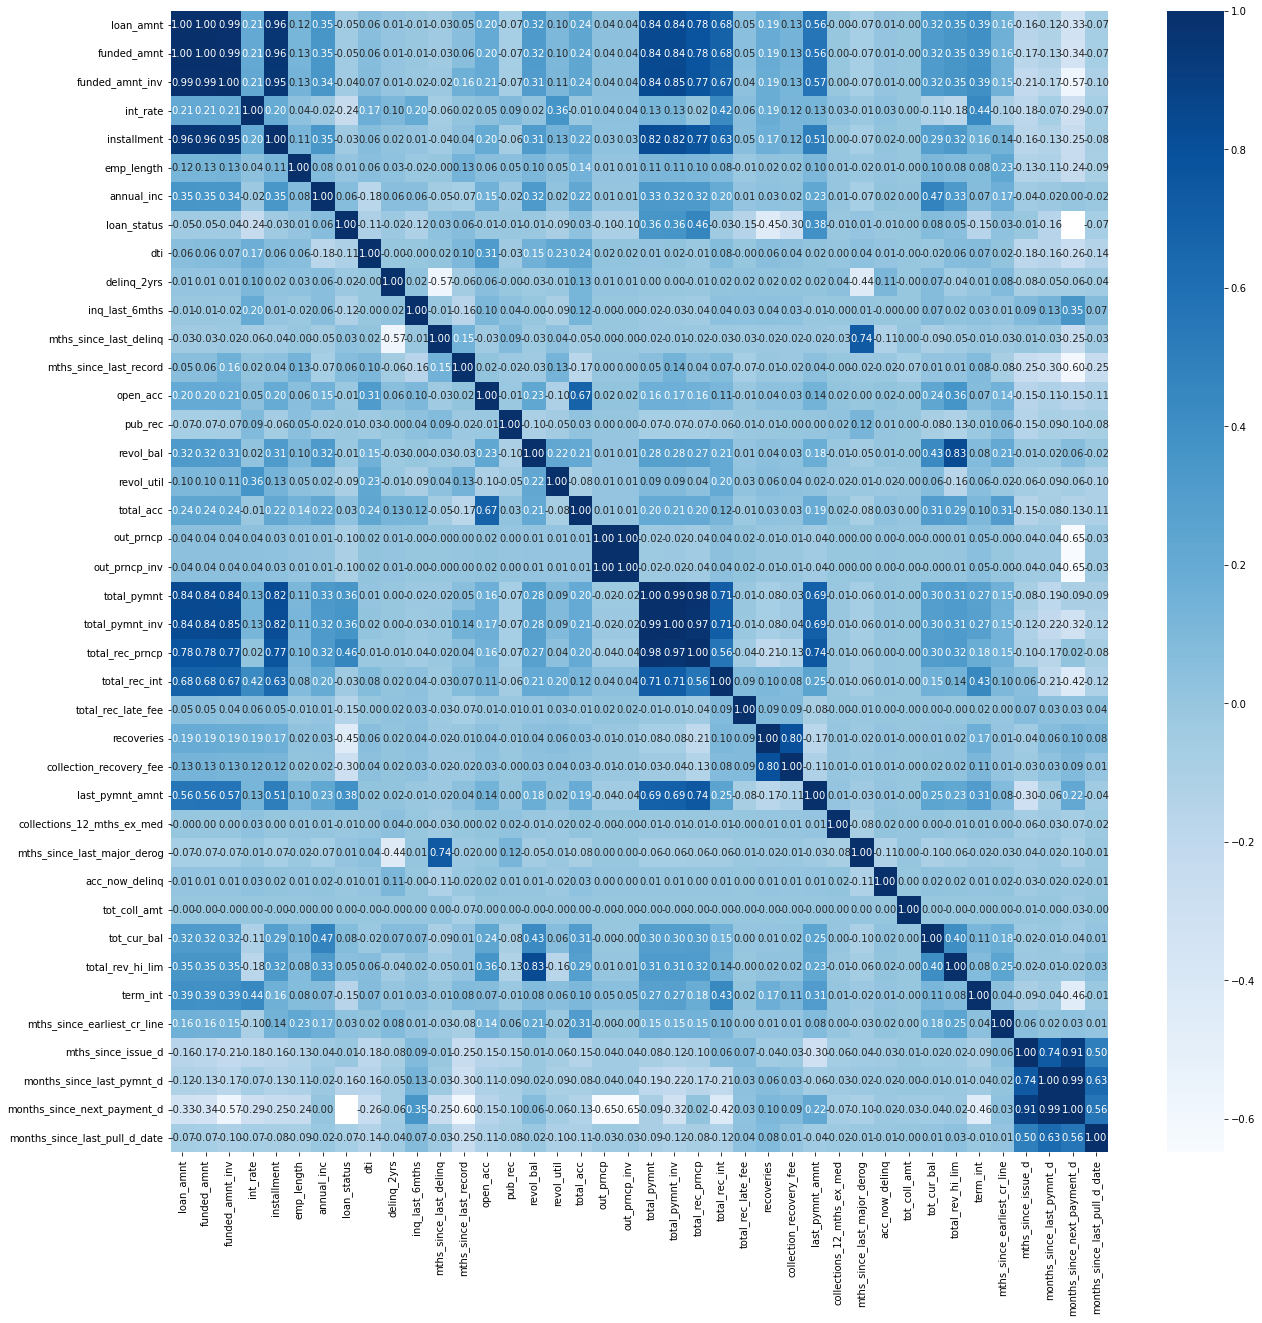

In [62]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Drop Column Dengan Korelasi Di Atas 0.7

In [63]:
columns_redundant = ['months_since_next_payment_d',
'revol_bal',
'funded_amnt',
'mths_since_last_major_derog',
'funded_amnt_inv',
'recoveries',
'total_rec_late_fee',
'installment',
'total_pymnt_inv',
'total_rec_prncp',
'total_pymnt',
'mths_since_issue_d']


In [64]:
df.drop(columns_redundant, axis=1, inplace=True)

In [65]:
df.select_dtypes(include='object').nunique()


grade                       7
emp_title              126879
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   49439
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [66]:
df.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [67]:
df.drop(['addr_state'], axis=1, inplace=True)

In [68]:
df.select_dtypes(exclude='object').nunique()

loan_amnt                          1308
int_rate                            505
emp_length                           11
annual_inc                        18195
loan_status                           2
dti                                3880
delinq_2yrs                          22
inq_last_6mths                       28
mths_since_last_delinq              125
mths_since_last_record              123
open_acc                             57
pub_rec                              12
revol_util                         1194
total_acc                           101
out_prncp                           821
out_prncp_inv                       824
total_rec_int                    172951
collection_recovery_fee           20275
last_pymnt_amnt                  179663
collections_12_mths_ex_med            7
acc_now_delinq                        6
tot_coll_amt                       3571
tot_cur_bal                      120962
total_rev_hi_lim                   9021
term_int                              2


### Handling Missing Value

In [69]:
df.isna().sum()

loan_amnt                             0
int_rate                              0
grade                                 0
emp_length                         8755
home_ownership                        0
annual_inc                            4
verification_status                   0
loan_status                           0
pymnt_plan                            0
purpose                               0
dti                                   0
delinq_2yrs                          29
inq_last_6mths                       29
mths_since_last_delinq           129684
mths_since_last_record           203149
open_acc                             29
pub_rec                              29
revol_util                          226
total_acc                            29
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
total_rec_int                         0
collection_recovery_fee               0
last_pymnt_amnt                       0


In [70]:
#drop kolom dengan jumlah missing diatas 75%
df.drop('mths_since_last_record', axis=1, inplace=True)

imputasi kolom kosong

In [71]:
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(), inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(), inplace=True)
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(), inplace=True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].median(), inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(), inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(df['mths_since_earliest_cr_line'].median(), inplace=True)
df['months_since_last_pull_d_date'].fillna(df['months_since_last_pull_d_date'].median(), inplace=True)
df['months_since_last_pymnt_d'].fillna(df['months_since_last_pymnt_d'].median(), inplace=True)

In [72]:
df.isna().sum()

loan_amnt                        0
int_rate                         0
grade                            0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
loan_status                      0
pymnt_plan                       0
purpose                          0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
mths_since_last_delinq           0
open_acc                         0
pub_rec                          0
revol_util                       0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_rec_int                    0
collection_recovery_fee          0
last_pymnt_amnt                  0
collections_12_mths_ex_med       0
acc_now_delinq                   0
tot_coll_amt                     0
tot_cur_bal                      0
total_rev_hi_lim    

### Feature Encoding

In [73]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
grade,230795,7,B,70622
home_ownership,230795,6,MORTGAGE,113627
verification_status,230795,3,Verified,85740
pymnt_plan,230795,2,n,230793
purpose,230795,14,debt_consolidation,133920
initial_list_status,230795,2,f,173143


In [74]:
columns_to_ohe = ['home_ownership','verification_status','purpose'] 

In [75]:
df['initial_list_status'].value_counts()

f    173143
w     57652
Name: initial_list_status, dtype: int64

In [76]:
df['pymnt_plan'].value_counts()

n    230793
y         2
Name: pymnt_plan, dtype: int64

In [77]:
df['verification_status'].value_counts()

Verified           85740
Not Verified       81139
Source Verified    63916
Name: verification_status, dtype: int64

In [78]:
df['grade'].value_counts()

B    70622
C    58626
A    39110
D    36740
E    16945
F     6896
G     1856
Name: grade, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [80]:
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}
df['grade'] = df['grade'].map(grade_map)

In [81]:
initial_list_status_map = {
    'f' : 1,
    'w' : 0,
}
df['initial_list_status'] = df['initial_list_status'].map(initial_list_status_map)

In [82]:
pymnt_plan_map = {
    'n' : 1,
    'y' : 0,
}
df['pymnt_plan'] = df['pymnt_plan'].map(pymnt_plan_map)

In [83]:
for columns_to_ohe in ['home_ownership','verification_status','purpose']:
    onehots = pd.get_dummies(df[columns_to_ohe], prefix=columns_to_ohe)
    df = df.join(onehots)

In [84]:
df = df.drop(['home_ownership','verification_status','purpose'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 53 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  int64  
 1   int_rate                             230795 non-null  float64
 2   grade                                230795 non-null  int64  
 3   emp_length                           230795 non-null  float64
 4   annual_inc                           230795 non-null  float64
 5   loan_status                          230795 non-null  int64  
 6   pymnt_plan                           230795 non-null  int64  
 7   dti                                  230795 non-null  float64
 8   delinq_2yrs                          230795 non-null  float64
 9   inq_last_6mths                       230795 non-null  float64
 10  mths_since_last_delinq               230795 non-null  float64
 11  open_acc     

In [85]:
onehots

,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,0,0,0,0,0,0,1,0,0,0,0,0,0
466277,0,0,1,0,0,0,0,0,0,0,0,0,0,0
466278,0,0,0,0,0,0,0,0,0,0,0,0,1,0
466281,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230795 entries, 0 to 466283
Data columns (total 53 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  int64  
 1   int_rate                             230795 non-null  float64
 2   grade                                230795 non-null  int64  
 3   emp_length                           230795 non-null  float64
 4   annual_inc                           230795 non-null  float64
 5   loan_status                          230795 non-null  int64  
 6   pymnt_plan                           230795 non-null  int64  
 7   dti                                  230795 non-null  float64
 8   delinq_2yrs                          230795 non-null  float64
 9   inq_last_6mths                       230795 non-null  float64
 10  mths_since_last_delinq               230795 non-null  float64
 11  open_acc     

### Feature Transformation

In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [88]:
standard = StandardScaler()
minmax = MinMaxScaler()

In [89]:
categorical_columns = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [90]:
categorical_columns

[]

In [91]:
numerical_columns = [col for col in df.columns.tolist() if col not in categorical_columns]

In [92]:
df_scaling = pd.DataFrame(minmax.fit_transform(df[numerical_columns]), columns=numerical_columns)

In [93]:
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230795 entries, 0 to 230794
Data columns (total 53 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  float64
 1   int_rate                             230795 non-null  float64
 2   grade                                230795 non-null  float64
 3   emp_length                           230795 non-null  float64
 4   annual_inc                           230795 non-null  float64
 5   loan_status                          230795 non-null  float64
 6   pymnt_plan                           230795 non-null  float64
 7   dti                                  230795 non-null  float64
 8   delinq_2yrs                          230795 non-null  float64
 9   inq_last_6mths                       230795 non-null  float64
 10  mths_since_last_delinq               230795 non-null  float64
 11  open_acc     

In [94]:
data=df_scaling.copy()

### Split Data

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x = data.drop('loan_status', axis=1)
y = data['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [97]:
x_train.shape, x_test.shape

((184636, 52), (46159, 52))

## 3. Modeling and Evaluation

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print('AUC:'+ str(roc_auc_score(y_test, y_pred)))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### 1. Logistics Regression

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

eval_classification(lr)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.93
Recall (Test Set): 0.97
F1-Score (Test Set): 0.95
AUC:0.837390545307422


In [100]:
print('Train score: ' + str(lr.score(x_train, y_train))) #accuracy
print('Test score: ' + str(lr.score(x_test, y_test))) #accuracy

Train score: 0.9144316384670379
Test score: 0.9149894928399662


In [101]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
hyperparameters = dict(penalty=penalty, C=C, solver=solver )

# Inisiasi model
logres = LogisticRegression(random_state=0) # Init Logres dengan Gridsearch, cross validation = 5
lr_tuned = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=0, scoring='recall')

# Fitting Model & Evaluation
lr_tuned.fit(x_train, y_train)
eval_classification(lr_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.89
Recall (Test Set): 0.98
F1-Score (Test Set): 0.93
AUC:0.7339450702985943


### 2. Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

eval_classification(rf)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.98
Recall (Test Set): 0.99
F1-Score (Test Set): 0.98
AUC:0.9541260022510945


In [103]:
print('Train score: ' + str(rf.score(x_train, y_train))) #accuracy
print('Test score:' + str(rf.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score:0.9755843930761064


### 3. XGBoost

In [104]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=0)
xg.fit(x_train, y_train)

eval_classification(xg)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.99
Recall (Test Set): 0.99
F1-Score (Test Set): 0.99
AUC:0.967296505577754


In [105]:
print('Train score: ' + str(xg.score(x_train, y_train))) #accuracy
print('Test score:' + str(xg.score(x_test, y_test))) #accuracy

Train score: 0.9883283866634892
Test score:0.9807188197317966


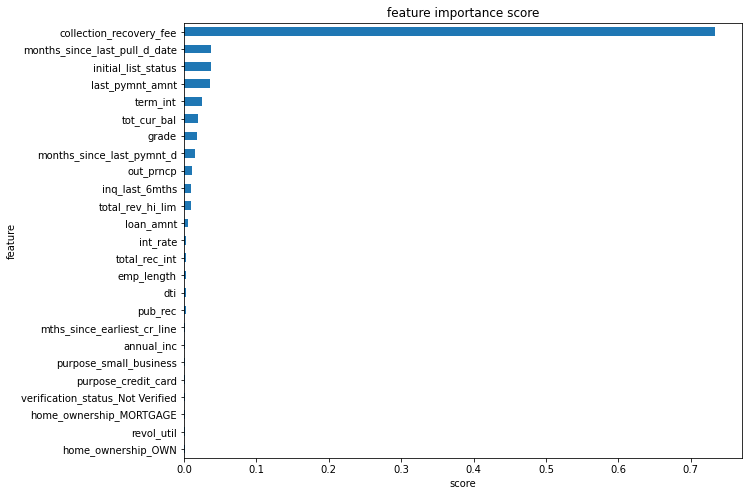

In [106]:
show_feature_importance(xg)

Validation

In [107]:
y_pred_proba = xg.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [108]:
df_actual_predicted

,y_actual,y_pred_proba
75261,1.0,0.999879
2605,1.0,0.993325
204328,1.0,0.999969
28760,1.0,0.997630
73669,0.0,0.033959
...,...,...
111791,1.0,0.999585
215611,1.0,0.997097
96470,1.0,0.999185
192457,0.0,0.000020


In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

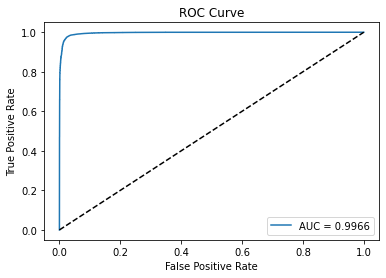

In [110]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

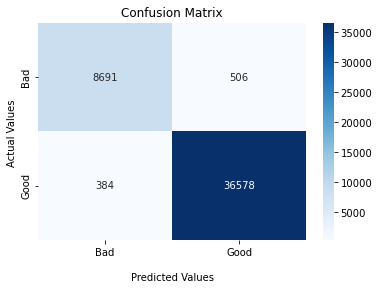

In [112]:
from sklearn.metrics import confusion_matrix
y_pred = xg.predict(x_test)
plot = confusion_matrix(y_test, y_pred)

#Plot
ax = sns.heatmap(plot, annot=True, cmap='Blues',fmt='g')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bad','Good'])
ax.yaxis.set_ticklabels(['Bad','Good'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [113]:
data.to_csv("Model_Prediction.csv", sep=',', encoding='UTF-8')